In [17]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

In [ ]:
#Meaning of the observations within a stimulus
#Session 1 start/end seconds

start_second= [30, 132, 287, 555, 773, 982, 1271, 1628, 1730, 2025, 2227, 2435, 2667, 2932, 3204]
end_second= [102, 228, 524, 742, 920, 1240, 1568, 1697, 1994, 2166, 2401, 2607, 2901, 3172, 3359]
duration=[]
min_per_segment=[]
for i in range(15):
    duration.append(end_second[i]-start_second[i])
for i in range(15):
    min_per_segment.append(duration[i]//(pd.DataFrame(data[i]).shape[0]))
#print(duration)
print(min_per_segment)

In [7]:
def splitdata(data, label, ntrainbatch=10):
    nbatch=ntrainbatch-1
    trainframes=[]
    testframes =[]
    for i in range(45):
        if i%15-1<nbatch:
            trainframes.append(pd.concat([pd.DataFrame(data[i]), pd.DataFrame(label[i])], axis=1))
        if i%15>nbatch:
            testframes.append(pd.concat([pd.DataFrame(data[i]), pd.DataFrame(label[i])], axis=1))
    train = pd.concat(trainframes)
    test  = pd.concat(testframes)
    return train, test

def gatherdata(X, y):
    Xyframes=[]
    for i in range(45):
        Xyframes.append(pd.concat([pd.DataFrame(X[i]), pd.DataFrame(y[i])], axis=1))
    XyDF = pd.concat(Xyframes)
    return XyDF

In [8]:
#Train-Test from Full DF function 
def fulldfsplit(nsubjects=16):
    '''Files must be labelled as {subject#}_123.npz' and should be inside a Data folder within the Project'''
    data16  = {}
    label16 = {}
    Xytrain16_list = []
    Xytest16_list  = []
    for i in range(1,nsubjects+1): 
        # Load all 16 files data into a Dict named 'i_123.npz' using a for loop
        data16[i]  = pickle.loads(np.load(f'../data/{i}_123.npz')['data'])
        label16[i] = pickle.loads(np.load(f'../data/{i}_123.npz')['label'])
            
    for i in range(1,nsubjects+1):
        #apply all data to the splitdata func to create lists of DFs 
        train, test = splitdata(data16[i], label16[i], 10)
        Xytrain16_list.append(train)
        Xytest16_list.append(test)

    #create a unified DF from every list with pd.concat(trainframes)
    Xytrain16_DF = pd.concat(Xytrain16_list)
    Xytest16_DF  = pd.concat(Xytest16_list)
    
    return Xytrain16_DF, Xytest16_DF

In [15]:
#Full DF no split
def fulldf(nsubjects=16):
    data16  = {}
    label16 = {}
    for i in range(1,nsubjects+1): 
        # Load all 16 files data into a Dict named 'i_123.npz' using a for loop
        data16[i]  = pickle.loads(np.load(f'../data/{i}_123.npz')['data'])
        label16[i] = pickle.loads(np.load(f'../data/{i}_123.npz')['label'])
    Xy16_list = []
    for i in range(1,nsubjects+1): 
        #apply all data to the gather data func to create lists of DFs 
        Xy = gatherdata(data16[i], label16[i])
        Xy16_list.append(Xy)
    XyDF = pd.concat(Xy16_list)
    XyDF.columns = [*XyDF.columns[:-1], 'target']
    return XyDF

In [16]:
df = fulldf()
df

,0,1,2,3,4,5,6,7,8,9,...,301,302,303,304,305,306,307,308,309,target
0,11.082522,8.915990,7.894088,8.393629,8.576055,10.450283,8.682803,7.425018,6.833982,6.431147,...,7.484101,6.889748,5.478040,4.247615,8.838729,7.736448,7.071955,5.657081,4.361506,4.0
1,11.081816,8.915104,7.893646,8.393852,8.575908,10.449770,8.681773,7.424501,6.833948,6.430860,...,7.483864,6.889452,5.477954,4.247919,8.838477,7.736124,7.071776,5.656987,4.361624,4.0
2,11.081139,8.914245,7.893116,8.394334,8.575671,10.449391,8.680753,7.424007,6.834211,6.430407,...,7.483311,6.888881,5.477563,4.248155,8.838380,7.735444,7.071462,5.656746,4.361780,4.0
3,11.080857,8.913749,7.893061,8.394893,8.575294,10.449425,8.680200,7.424111,6.834612,6.429797,...,7.482540,6.887955,5.476832,4.248294,8.838502,7.734421,7.070929,5.656415,4.362126,4.0
4,11.081297,8.913816,7.893386,8.395509,8.575009,10.449813,8.680219,7.424706,6.835073,6.429158,...,7.481893,6.886515,5.475891,4.248291,8.839146,7.733523,7.069984,5.656045,4.362404,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,9.529579,8.318256,7.732816,9.397791,9.115455,9.694111,8.470004,7.941205,9.614300,9.135193,...,7.976777,6.852695,5.551061,4.070139,9.062504,7.982785,6.853389,5.555958,4.077902,0.0
40,9.530539,8.318164,7.733501,9.398356,9.115913,9.695149,8.469489,7.941748,9.614058,9.136483,...,7.976474,6.851993,5.551469,4.070357,9.060047,7.982550,6.852656,5.556333,4.078116,0.0
41,9.531535,8.318104,7.734126,9.398800,9.116187,9.696553,8.469255,7.942313,9.613791,9.137544,...,7.976266,6.851362,5.551913,4.070373,9.058366,7.982399,6.851989,5.556733,4.078134,0.0
42,9.532130,8.318357,7.734763,9.399152,9.116486,9.697598,8.469410,7.942883,9.613622,9.138365,...,7.976297,6.850847,5.552422,4.070364,9.057412,7.982475,6.851438,5.557197,4.078131,0.0


<AxesSubplot:>

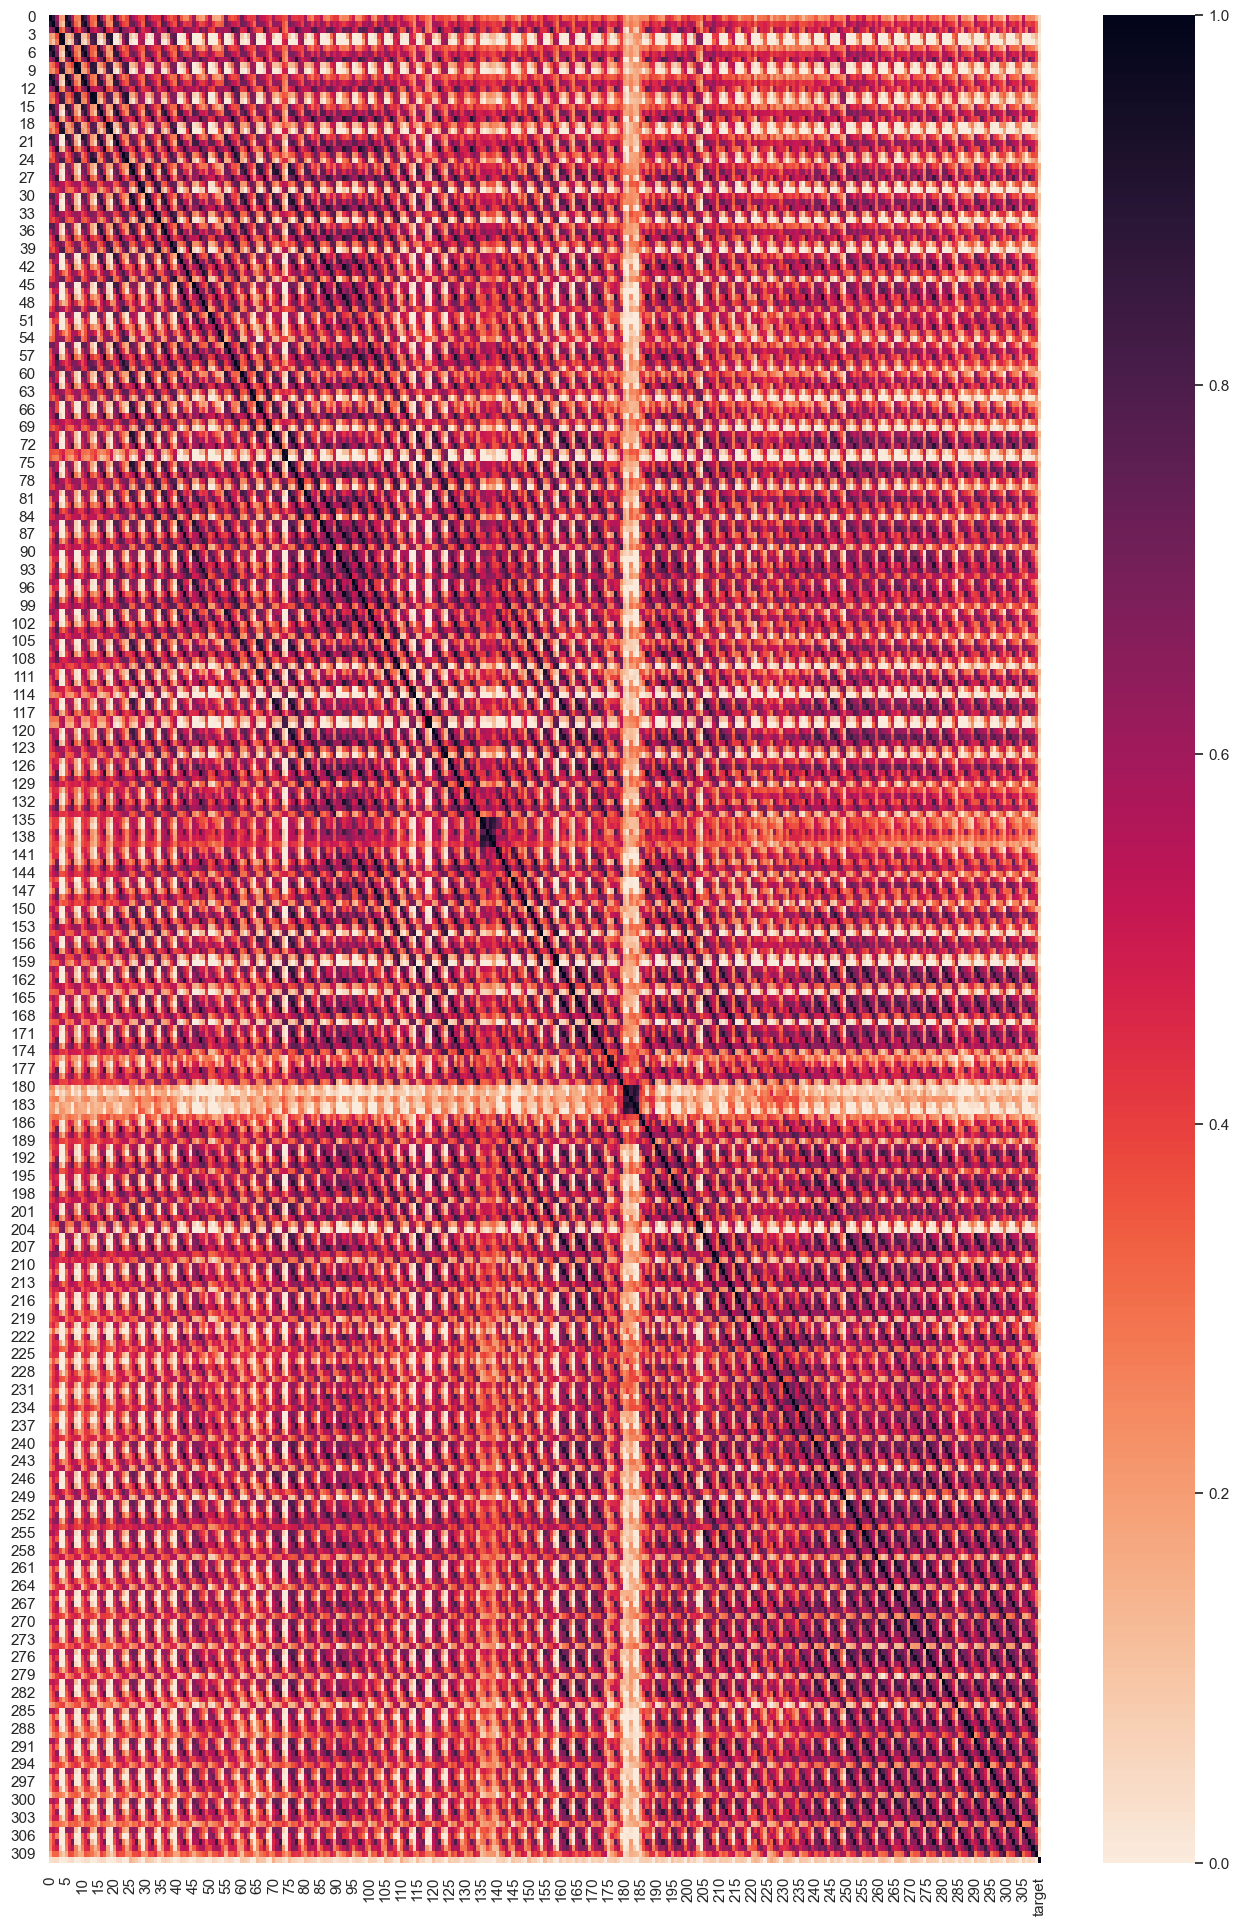

In [18]:
sns.set_theme(rc={"figure.figsize":(16,24)})
sns.heatmap(df.corr(method="spearman"), cmap="rocket_r", vmin=0)

In [19]:
pd.set_option("display.max_rows", None)
df.corr(method="kendall").iloc[:, -1]

0         0.022270
1         0.027815
2         0.032563
3        -0.033135
4        -0.047909
5         0.007439
6         0.023713
7         0.030828
8        -0.058476
9        -0.079389
10        0.016857
11        0.028108
12        0.023550
13       -0.048057
14       -0.057388
15        0.022233
16        0.033265
17        0.033054
18       -0.009264
19       -0.038199
20        0.008102
21        0.030304
22        0.032016
23       -0.018944
24       -0.044585
25        0.109117
26        0.081133
27        0.064869
28        0.032513
29       -0.002273
30        0.081334
31        0.066307
32        0.055287
33        0.027851
34       -0.003149
35        0.046296
36        0.053231
37        0.041173
38        0.024182
39       -0.007313
40        0.014641
41        0.040595
42        0.033917
43        0.020596
44       -0.017574
45        0.009773
46        0.036756
47        0.034139
48        0.025744
49       -0.024119
50        0.014337
51        0.045199
52        0.